In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('../data/cleaning_3/clean.csv')

df

,Unnamed: 0,pitch_id,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,description,zone,...,zone_6.0,zone_7.0,zone_8.0,zone_9.0,zone_11.0,zone_12.0,zone_13.0,zone_14.0,Batter Side,Pitcher Side
0,0,2909,2020-09-27,91.6,2.31,6.19,605137,543272,hit_into_play,1.0,...,False,False,False,False,False,False,False,False,0,1
1,1,3035,2020-09-27,80.4,2.45,6.12,605137,543272,ball,13.0,...,False,False,False,False,False,False,True,False,0,1
2,10,2900,2020-09-27,96.7,-2.20,5.92,596019,664977,hit_into_play,8.0,...,False,False,True,False,False,False,False,False,1,0
3,11,2960,2020-09-27,97.1,-2.20,5.99,596019,664977,called_strike,3.0,...,False,False,False,False,False,False,False,False,1,0
4,12,3154,2020-09-27,97.3,-2.34,5.94,596019,664977,ball,12.0,...,False,False,False,False,False,True,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531242,3109426,1861,2024-03-20,91.3,-2.10,5.61,660271,506433,foul,8.0,...,False,False,True,False,False,False,False,False,1,0
531243,3109427,1994,2024-03-20,95.7,-2.13,5.77,660271,506433,ball,12.0,...,False,False,False,False,False,True,False,False,1,0
531244,3109428,2223,2024-03-20,93.9,-2.17,5.70,605141,506433,ball,11.0,...,False,False,False,False,True,False,False,False,0,0
531245,3109429,2348,2024-03-20,93.4,-2.00,5.70,605141,506433,ball,6.0,...,True,False,False,False,False,False,False,False,0,0


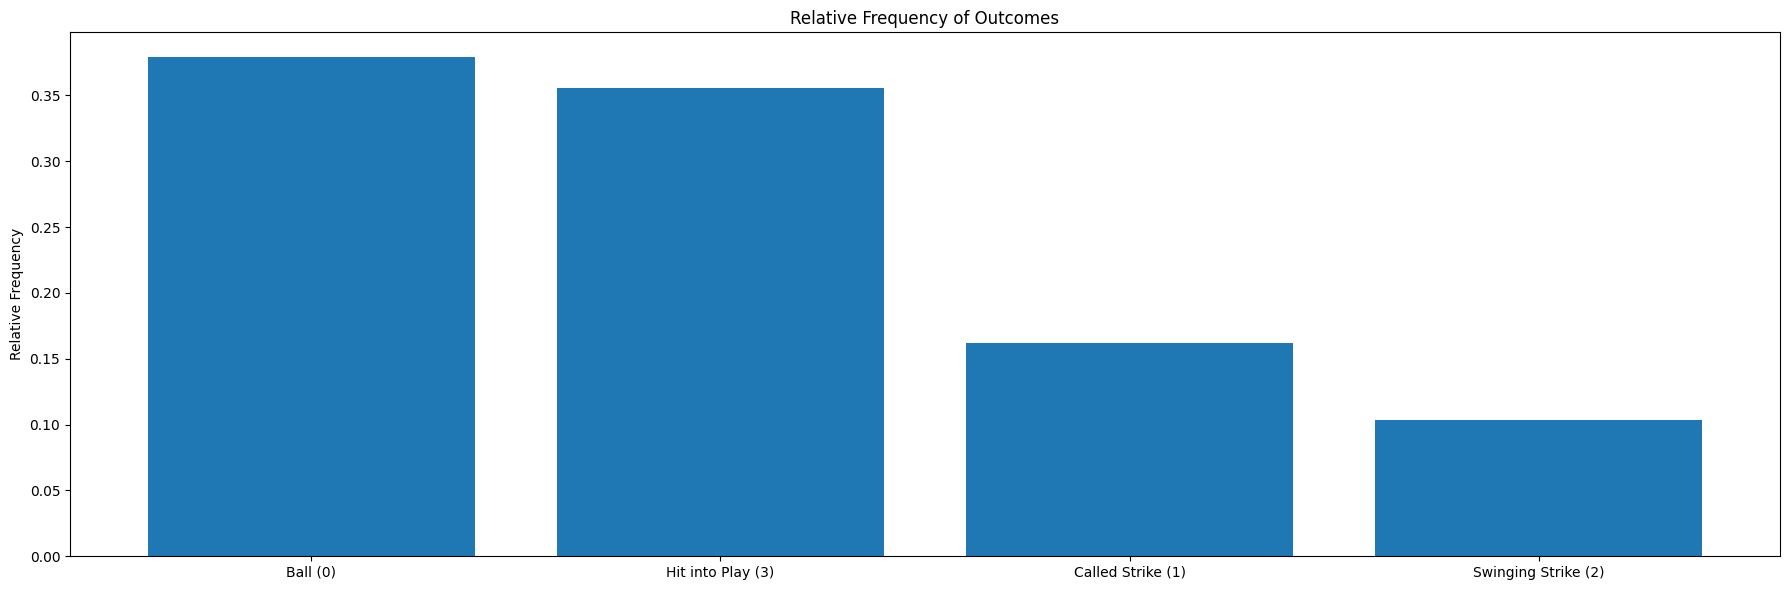

,Outcome,Relative Frequency
0,Ball (0),0.378910
1,Hit into Play (3),0.355716
2,Called Strike (1),0.161593
3,Swinging Strike (2),0.103780


In [3]:
vc = pd.DataFrame(df['Outcome'].value_counts(normalize=True)).T

vc.columns = ["Ball (0)", "Hit into Play (3)", "Called Strike (1)", "Swinging Strike (2)"]

vc = vc.T.reset_index()

plt.figure(figsize=(18, 6))
plt.bar(vc["index"], vc["proportion"])
plt.xticks(rotation=0)
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Outcomes")
plt.tight_layout()
plt.show()

vc.columns = ["Outcome", "Relative Frequency"]

vc


In [4]:
models = joblib.load("models.pkl")

In [5]:
eval_df = pd.read_csv('output/evaluations.csv')

In [6]:
pd.DataFrame(eval_df.describe()[[f"{model} recall" for model in ["SVM", "RF", "NN", "Decision Tree", "Hierarchical"]]].T[["mean", "std"]].T)*100

,SVM recall,RF recall,NN recall,Decision Tree recall,Hierarchical recall
mean,55.988147,54.952847,52.328022,52.340025,51.201894
std,2.043369,1.569837,2.248932,2.522449,1.933780


In [7]:
importance_df = pd.read_csv('output/importance.csv')

importance_df.drop(columns=["Unnamed: 0", "Player ID"], inplace=True)

In [8]:
importance_df

,Player,Model,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
0,bryan reynolds,SVM,0.013564,0.045960,0.002440,0.003708,0.007904,0.006831,0.005562,0.017857,...,0.004879,0.004196,0.001464,0.005464,0.001952,0.001171,0.002830,0.000683,0.002342,0.021858
1,bryan reynolds,Random Forest,0.018540,0.074063,0.008685,0.009758,0.013661,0.008392,0.009758,0.021760,...,0.009758,0.004489,0.000683,0.000390,0.000000,0.005074,0.003415,0.000488,0.000098,0.004196
2,bryan reynolds,Neural Network,0.006276,0.027471,0.004309,0.008384,0.001593,0.002810,0.001124,0.002529,...,0.005152,0.007190,0.001218,0.001030,0.000351,0.004871,-0.000211,-0.000023,0.000094,-0.000211
3,bryan reynolds,Decision Tree,0.000000,0.000000,0.000000,0.000293,0.000000,0.000000,0.000000,0.000683,...,-0.005269,0.000000,0.000000,0.000000,0.000000,-0.000488,-0.003415,0.000000,0.000000,0.000195
4,manny machado,SVM,0.008328,0.050072,0.005141,0.009768,0.007711,0.000308,0.002570,0.010179,...,0.005449,0.004113,0.000411,0.001028,0.001028,0.006889,0.004113,0.000720,0.001851,0.013469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,yandy díaz,Decision Tree,0.000000,0.091138,0.000657,0.000000,0.000000,0.000219,0.000000,0.000876,...,0.008544,0.000000,0.000000,0.000000,0.000000,0.001643,0.000000,0.000000,0.000000,0.002958
196,matt olson,SVM,0.021912,0.060923,0.006806,0.009960,0.008632,0.007636,0.010624,0.013778,...,0.004067,0.006308,0.006889,0.005063,0.001411,0.001909,0.007636,0.001826,0.000249,0.009462
197,matt olson,Random Forest,0.025066,0.089309,0.006972,0.009960,0.007304,0.007138,0.007885,0.017679,...,0.004814,0.002656,0.002407,0.001245,-0.000166,0.001909,0.001079,0.000913,0.000083,0.004731
198,matt olson,Neural Network,0.008765,0.041315,0.002311,0.005378,0.002988,0.002251,0.001255,0.003645,...,0.003625,0.003367,0.003446,0.001355,-0.000060,0.000857,0.000498,0.000857,0.002092,0.006116


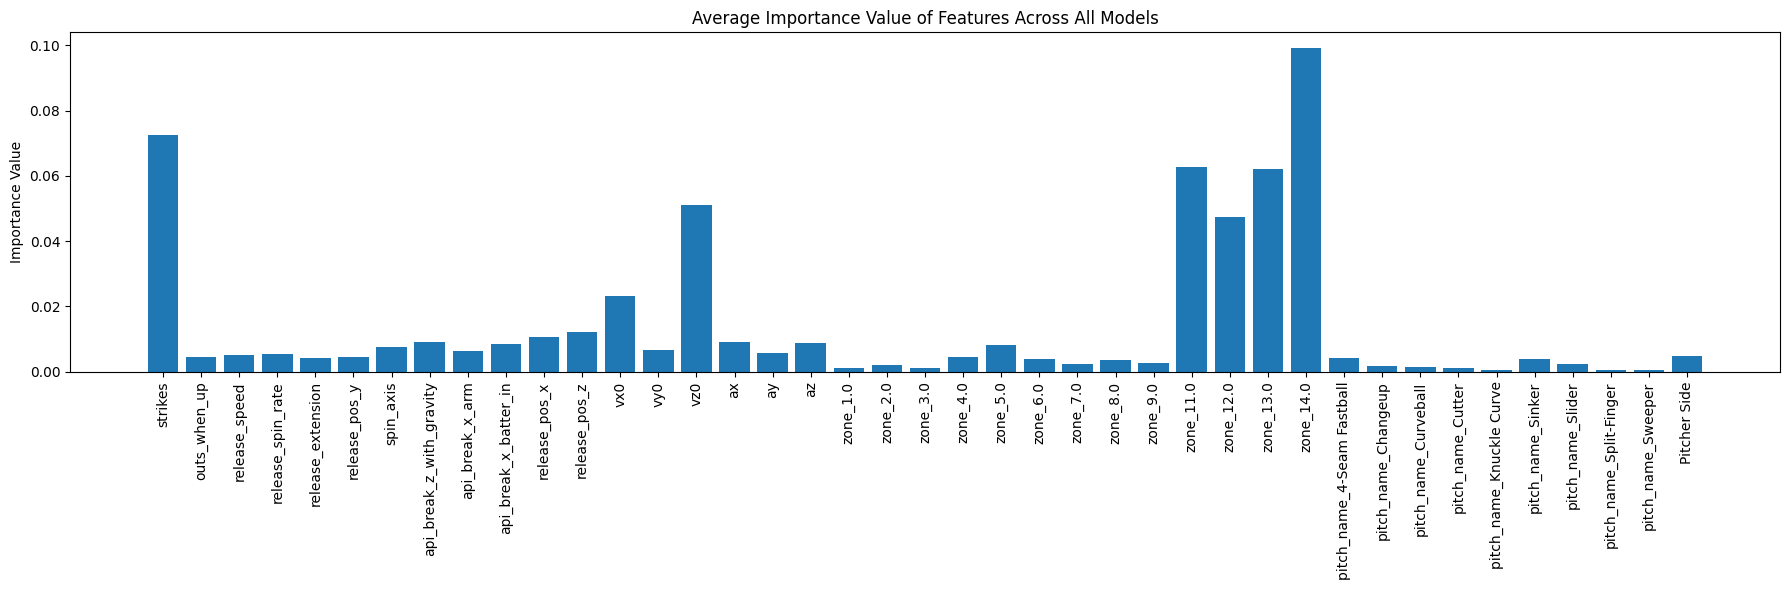

,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,api_break_z_with_gravity,api_break_x_arm,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.010169,0.072633,0.004571,0.005194,0.005326,0.004301,0.004526,0.007577,0.008993,0.006296,...,0.004265,0.001756,0.001427,0.001068,0.000445,0.003998,0.002271,0.000481,0.000652,0.004689
std,0.008896,0.028509,0.003412,0.004398,0.004356,0.003606,0.004000,0.006301,0.006695,0.004831,...,0.005474,0.002212,0.001781,0.001559,0.000667,0.003786,0.002916,0.000748,0.001100,0.005199
min,-0.000309,0.000000,-0.000881,-0.001469,-0.001214,-0.003848,-0.001034,-0.003003,0.000000,-0.000635,...,-0.010781,-0.002676,-0.000580,-0.003217,-0.001175,-0.004695,-0.007715,-0.000800,-0.001511,-0.003198
25%,0.004241,0.052013,0.001472,0.000269,0.001139,0.000717,0.000431,0.001834,0.002303,0.001470,...,0.000748,0.000000,0.000000,0.000000,0.000000,0.001044,0.000000,0.000000,0.000000,0.000764
50%,0.008709,0.072107,0.004713,0.004506,0.004918,0.004105,0.004183,0.006825,0.009031,0.006130,...,0.004590,0.001326,0.000687,0.000550,0.000157,0.003239,0.001846,0.000120,0.000203,0.003048
75%,0.014572,0.090654,0.007088,0.008914,0.008738,0.007227,0.007586,0.012632,0.013290,0.010169,...,0.007824,0.002879,0.002349,0.001450,0.000662,0.006592,0.004004,0.000833,0.000920,0.007720
max,0.057418,0.167881,0.014506,0.016927,0.016106,0.016268,0.015055,0.027884,0.032973,0.017649,...,0.020135,0.011790,0.008303,0.008793,0.003397,0.015859,0.012259,0.003228,0.005610,0.032000


In [9]:
im_df_sum = importance_df.describe()

labels = pd.DataFrame(im_df_sum.T["mean"]).reset_index()[1:]["index"]
values = pd.DataFrame(im_df_sum.T["mean"]).reset_index()[1:]["mean"]

plt.figure(figsize=(18, 6))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.ylabel("Importance Value")
plt.title("Average Importance Value of Features Across All Models")
plt.tight_layout()
plt.show()

im_df_sum

In [10]:
features_df = importance_df.groupby("Model").mean(numeric_only=True).T
features_df["Total"] = features_df.sum(axis = 1)

features_df = features_df.sort_values("Total", ascending=False)

features_df.drop(columns="Total", inplace=True)

features_df = features_df.reset_index()

features_df

top_10_features = features_df[:10]["index"]

top_10_features

0        zone_14.0
1          strikes
2        zone_11.0
3        zone_13.0
4              vz0
5        zone_12.0
6              vx0
7    release_pos_z
8    release_pos_x
9            balls
Name: index, dtype: object

In [11]:
importance_df[importance_df["Model"] == "SVM"][:10]

,Player,Model,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
0,bryan reynolds,SVM,0.013564,0.045960,0.002440,0.003708,0.007904,0.006831,0.005562,0.017857,...,0.004879,0.004196,0.001464,0.005464,0.001952,0.001171,0.002830,0.000683,0.002342,0.021858
4,manny machado,SVM,0.008328,0.050072,0.005141,0.009768,0.007711,0.000308,0.002570,0.010179,...,0.005449,0.004113,0.000411,0.001028,0.001028,0.006889,0.004113,0.000720,0.001851,0.013469
8,eugenio suárez,SVM,0.011688,0.051537,0.004141,0.002853,0.002209,0.006258,0.006902,0.011780,...,0.005706,0.001565,0.006442,0.001565,0.001933,0.003221,0.006902,0.001657,0.001012,0.006350
12,juan soto,SVM,0.004639,0.078344,0.004552,0.000000,0.002451,0.008053,0.004289,0.011292,...,-0.004377,-0.000175,0.001050,0.004464,0.000438,0.002188,0.002539,0.000700,0.001663,0.001050
16,paul goldschmidt,SVM,0.013841,0.091069,0.009698,0.002468,0.009874,0.007670,0.007229,0.012342,...,0.008199,0.001675,0.004055,0.004232,0.002997,0.012254,0.008904,0.000353,0.004761,0.008904
20,marcus semien,SVM,0.002074,0.043211,0.001815,0.002074,0.003370,0.009507,0.006309,0.009420,...,-0.004235,-0.001556,0.003284,0.002852,0.001642,-0.001123,0.006136,0.000519,0.002161,-0.003198
24,vladimir guerrero,SVM,0.008267,0.056442,0.008457,0.005986,0.012258,0.005416,0.005131,0.009977,...,0.002946,0.001140,0.002376,0.002471,0.001615,0.003421,0.002376,0.001140,0.003041,0.009597
28,xander bogaerts,SVM,0.008804,0.135499,0.007691,0.005464,0.012953,0.004453,0.007488,0.007792,...,0.005262,0.001923,0.002226,0.004351,0.000506,0.012346,0.003947,0.002226,-0.000202,0.007994
32,willy adames,SVM,0.015697,0.060739,0.007507,0.004582,0.001657,0.002925,0.007605,0.006922,...,0.008580,0.004290,0.004387,-0.003217,0.001755,0.010042,0.004387,0.000292,0.002340,0.008190
36,pete alonso,SVM,0.011206,0.071795,0.003039,0.006553,0.008737,0.009022,0.010541,0.014150,...,0.004558,0.003894,0.007407,0.002849,0.001614,0.007123,0.006078,0.002374,0.002374,0.015764


In [12]:
importance_df[importance_df["Player"].isin(["aaron judge", "trea turner"])]

,Player,Model,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
96,aaron judge,SVM,0.013120,0.054519,0.010107,0.007872,0.005345,0.011662,0.000486,0.007775,...,0.009524,3.700743e-17,0.003499,0.003013,0.000680,0.006900,0.006414,0.002138,0.004665,0.018853
97,aaron judge,Random Forest,0.022838,0.092323,0.010884,0.012925,0.010496,0.010593,0.011856,0.014674,...,0.007872,4.373178e-03,0.001069,0.000875,0.000000,0.011079,0.002818,0.001166,0.000194,0.000875
98,aaron judge,Neural Network,0.005854,0.043610,0.005364,0.004291,0.005224,0.004198,0.003591,0.006553,...,0.002402,4.734142e-03,0.002309,0.000910,0.000396,0.003195,0.001399,0.000210,-0.000093,0.008605
99,aaron judge,Decision Tree,0.010010,0.055782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001555,3.790087e-03,0.000000,-0.000292,0.000000,0.003887,0.000000,0.000000,0.000000,0.000000
172,trea turner,SVM,0.006040,0.076982,0.002013,-0.000288,0.001821,0.001534,0.000383,0.001055,...,-0.001055,9.586809e-05,0.001630,0.006998,0.002397,0.004218,0.001630,0.001150,-0.000383,0.002684
173,trea turner,Random Forest,0.010450,0.112453,0.004410,0.006903,0.008245,0.006807,0.007094,0.005081,...,0.004506,2.876043e-03,0.000383,-0.000192,0.000575,0.005560,0.002588,0.000863,0.000000,0.000863
174,trea turner,Neural Network,0.008674,0.045278,0.001749,0.004118,0.004716,0.002416,0.001242,0.000805,...,0.010997,2.415737e-03,0.000023,0.002209,0.000529,0.011204,0.004716,-0.000115,0.001518,0.001749
175,trea turner,Decision Tree,0.000959,0.072189,-0.000288,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005656,0.000000e+00,0.000000,0.000000,0.000000,0.010833,0.000000,0.000000,0.000000,0.000000


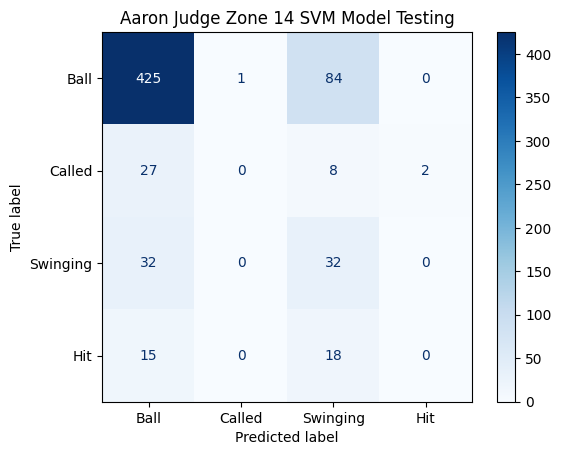

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       510
           1       0.00      0.00      0.00        37
           2       0.23      0.50      0.31        64
           3       0.00      0.00      0.00        33

    accuracy                           0.71       644
   macro avg       0.27      0.33      0.29       644
weighted avg       0.70      0.71      0.70       644



In [ ]:
judge_test_df = models["aaron judge"]["SVM Model"].test_df

judge_test_df = judge_test_df[judge_test_df["zone"] == 14]

cm = confusion_matrix(list(judge_test_df["True Label"]), list(judge_test_df["Predicted Label"]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ball', 'Called', 'Swinging', 'Hit'])

disp.plot(cmap='Blues')
plt.title(f"Aaron Judge Zone 14 SVM Model Testing")
plt.show()

print(classification_report(list(judge_test_df["True Label"]), list(judge_test_df["Predicted Label"])))

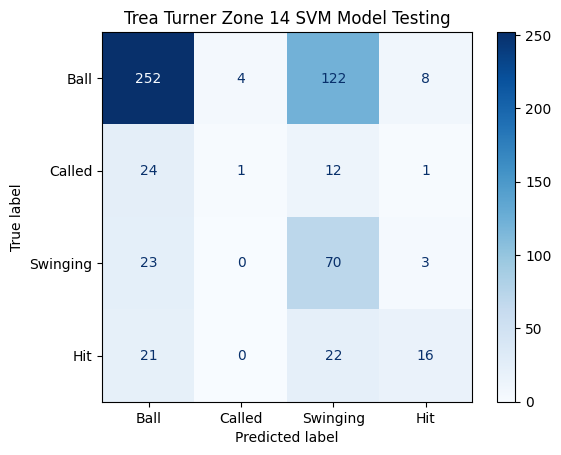

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       386
           1       0.20      0.03      0.05        38
           2       0.31      0.73      0.43        96
           3       0.57      0.27      0.37        59

    accuracy                           0.59       579
   macro avg       0.47      0.42      0.39       579
weighted avg       0.65      0.59      0.59       579



In [ ]:
trea_test_df = models["trea turner"]["SVM Model"].test_df

trea_test_df = trea_test_df[trea_test_df["zone"] == 14]

cm = confusion_matrix(list(trea_test_df["True Label"]), list(trea_test_df["Predicted Label"]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ball', 'Called', 'Swinging', 'Hit'])

disp.plot(cmap='Blues')
plt.title(f"Trea Turner Zone 14 SVM Model Testing")
plt.show()

print(classification_report(list(trea_test_df["True Label"]), list(trea_test_df["Predicted Label"])))

,Player,Model,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
0,bryan reynolds,SVM,0.013564,0.045960,0.002440,0.003708,0.007904,0.006831,0.005562,0.017857,...,0.004879,0.004196,0.001464,0.005464,0.001952,0.001171,0.002830,0.000683,0.002342,0.021858
4,manny machado,SVM,0.008328,0.050072,0.005141,0.009768,0.007711,0.000308,0.002570,0.010179,...,0.005449,0.004113,0.000411,0.001028,0.001028,0.006889,0.004113,0.000720,0.001851,0.013469
8,eugenio suárez,SVM,0.011688,0.051537,0.004141,0.002853,0.002209,0.006258,0.006902,0.011780,...,0.005706,0.001565,0.006442,0.001565,0.001933,0.003221,0.006902,0.001657,0.001012,0.006350
12,juan soto,SVM,0.004639,0.078344,0.004552,0.000000,0.002451,0.008053,0.004289,0.011292,...,-0.004377,-0.000175,0.001050,0.004464,0.000438,0.002188,0.002539,0.000700,0.001663,0.001050
16,paul goldschmidt,SVM,0.013841,0.091069,0.009698,0.002468,0.009874,0.007670,0.007229,0.012342,...,0.008199,0.001675,0.004055,0.004232,0.002997,0.012254,0.008904,0.000353,0.004761,0.008904


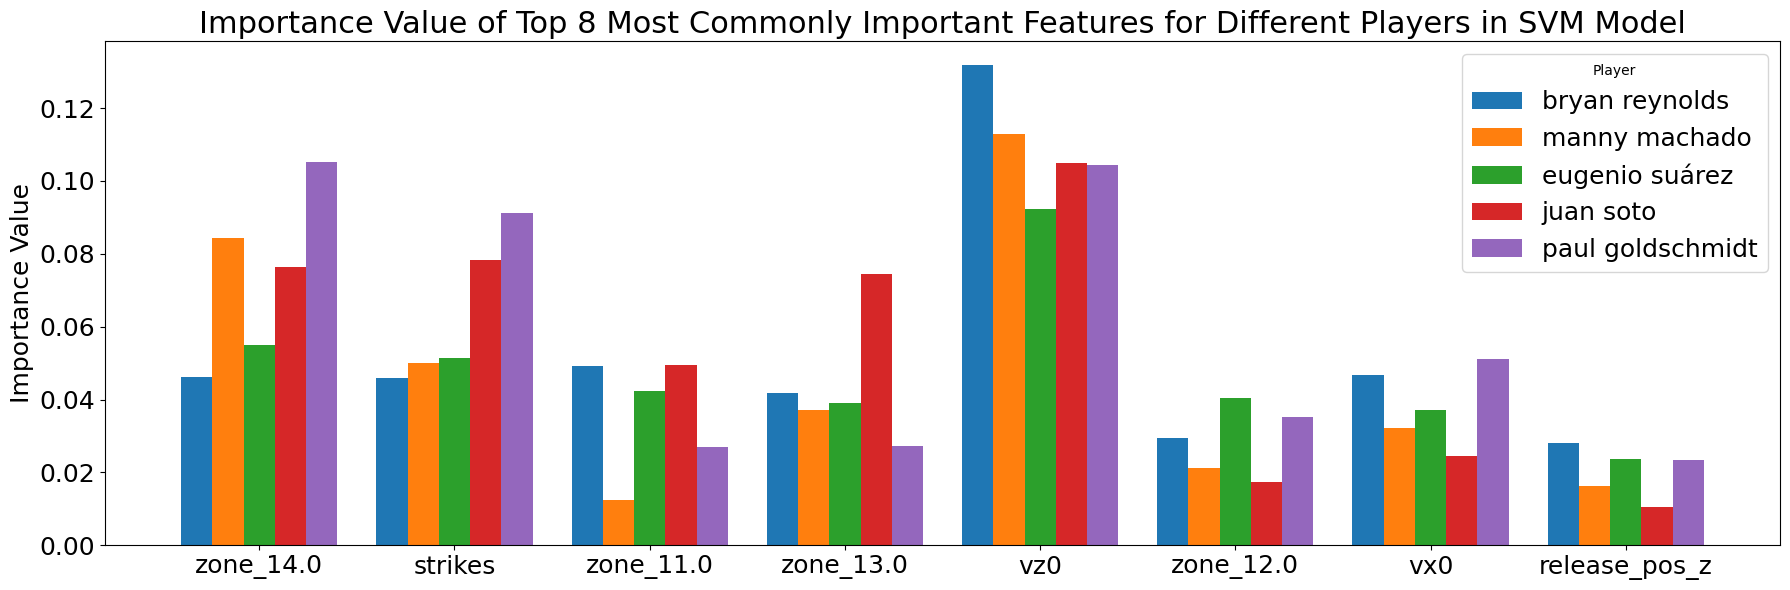

In [ ]:
snippet_df = importance_df[importance_df["Model"] == "SVM"][:5]

display(snippet_df)

players = snippet_df["Player"].tolist()
attributes = top_10_features[:8]

importance_by_player = {
    player: snippet_df.loc[snippet_df["Player"] == player, attributes].values.flatten().tolist()
    for player in players
}

x = np.arange(len(attributes))
width = 0.8 / len(players)

fig, ax = plt.subplots(figsize=(18, 6))

for i, (player, measurements) in enumerate(importance_by_player.items()):
    ax.bar(x + i * width, measurements, width, label=player)

ax.set_ylabel("Importance Value", fontsize=18)
ax.set_title("Importance Value of Top 8 Most Commonly Important Features for Different Players in SVM Model", fontsize=22)
ax.set_xticks(x + width * (len(players) - 1) / 2, attributes)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(title="Player", fontsize=18)

plt.tight_layout()
plt.show()


,Player,Model,balls,strikes,outs_when_up,release_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,...,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Cutter,pitch_name_Knuckle Curve,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_Sweeper,Pitcher Side
96,aaron judge,SVM,0.01312,0.054519,0.010107,0.007872,0.005345,0.011662,0.000486,0.007775,...,0.009524,3.700743e-17,0.003499,0.003013,0.000680,0.006900,0.006414,0.002138,0.004665,0.018853
172,trea turner,SVM,0.00604,0.076982,0.002013,-0.000288,0.001821,0.001534,0.000383,0.001055,...,-0.001055,9.586809e-05,0.001630,0.006998,0.002397,0.004218,0.001630,0.001150,-0.000383,0.002684


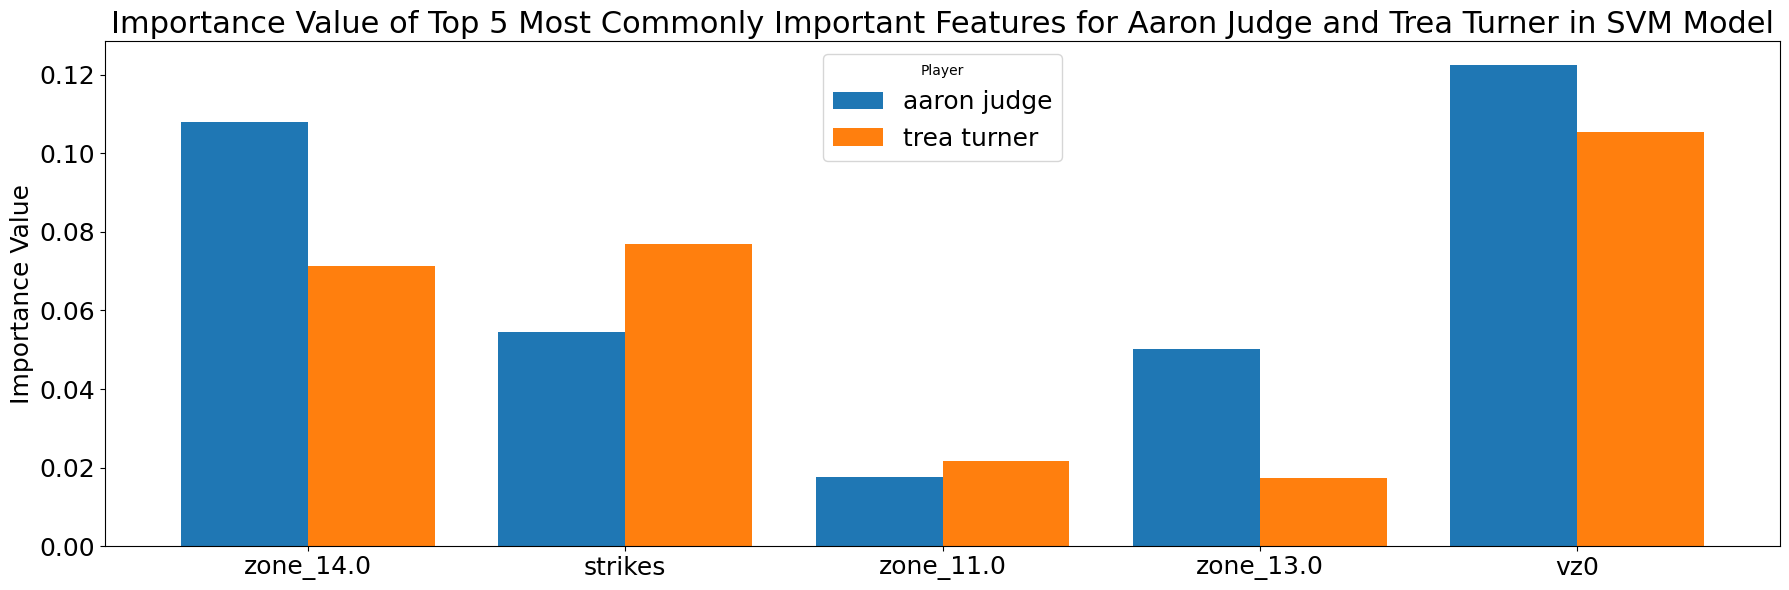

In [ ]:
snippet_df = importance_df[
    importance_df["Player"].isin(["aaron judge", "trea turner"]) &
    (importance_df["Model"] == "SVM")
]

display(snippet_df)

players = snippet_df["Player"].tolist()
attributes = top_10_features[:5]

importance_by_player = {
    player: snippet_df.loc[snippet_df["Player"] == player, attributes].values.flatten().tolist()
    for player in players
}

x = np.arange(len(attributes))
width = 0.8 / len(players)

fig, ax = plt.subplots(figsize=(18, 6))

for i, (player, measurements) in enumerate(importance_by_player.items()):
    ax.bar(x + i * width, measurements, width, label=player)

ax.set_ylabel("Importance Value", fontsize=18)
ax.set_title("Importance Value of Top 5 Most Commonly Important Features for Aaron Judge and Trea Turner in SVM Model", fontsize=22)
ax.set_xticks(x + width * (len(players) - 1) / 2, attributes)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(title="Player", fontsize=18)

plt.tight_layout()
plt.show()


In [17]:
snippet_df.T

,96,172
Player,aaron judge,trea turner
Model,SVM,SVM
balls,0.01312,0.00604
strikes,0.054519,0.076982
outs_when_up,0.010107,0.002013
release_speed,0.007872,-0.000288
release_spin_rate,0.005345,0.001821
release_extension,0.011662,0.001534
release_pos_y,0.000486,0.000383
spin_axis,0.007775,0.001055
